In [1]:
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Dropout
from keras import optimizers, regularizers
from datetime import datetime
from keras.callbacks import ModelCheckpoint, TensorBoard
import numpy as np
from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from keras.utils import to_categorical
from keras import optimizers

random_state = 6
np.random.seed(random_state)

Using TensorFlow backend.


### Define parameters

In [2]:
filename = 'seismogram_data_cents_db.csv'
df = pd.read_csv(filename)
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211
count,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,1606.000000,...,1606.000000,1606.000000,1606.000000,1606.0,1606.000000,1606.000000,1.606000e+03,1.606000e+03,1606.000000,1606.000000
mean,451.221669,941.665095,75.003741,9.231527,50.089629,9.011473,33.163889,11.137501,21.313839,13.738046,...,-79.980776,-79.979309,-79.978603,0.0,278.243072,-0.188070,3.743952e+12,5.021586e+17,31.972242,0.323163
std,302.649662,225.061154,37.099307,35.261332,19.673425,23.210687,12.591131,14.331587,7.673028,8.545568,...,0.190952,0.217414,0.185078,0.0,7662.201633,4.893058,2.781032e+13,4.202786e+18,763.247083,0.467830
min,0.000000,487.638894,0.590916,-95.650386,9.991572,-63.162621,5.273298,-38.585637,0.495500,-20.883890,...,-80.000008,-80.000008,-80.000008,0.0,-18424.601562,-148.536407,1.145826e+00,1.647420e+08,-1.557898,0.000000
25%,200.250000,775.150225,46.703585,-14.839313,36.362204,-7.899532,24.523875,2.047651,16.663696,9.773171,...,-80.000000,-80.000000,-80.000000,0.0,-0.564912,-0.066578,1.089125e+05,4.726152e+10,-0.056514,0.000000
50%,401.000000,900.926968,74.069958,12.228716,49.900223,12.684427,31.645115,14.229327,20.592639,15.489321,...,-80.000000,-80.000000,-80.000000,0.0,0.114271,-0.004160,1.769261e+06,7.682032e+11,0.241702,0.000000
75%,684.750000,1095.790912,100.281783,35.329806,63.719153,28.028384,40.849423,22.416433,25.514643,19.247300,...,-80.000000,-80.000000,-80.000000,0.0,2.218386,0.057529,6.593582e+08,8.217131e+14,1.950677,1.000000
max,1086.000000,1572.073401,202.898203,98.485401,123.096246,64.457973,81.809122,47.306912,52.774850,39.409499,...,-73.452782,-72.382477,-74.135483,0.0,300014.312500,11.173301,3.098055e+14,6.909585e+19,27426.243439,1.000000


In [3]:
n_feature = np.shape(df)[1] - 2

X = df.iloc[:,:n_feature]
Y = df.iloc[:,-1]

X, Y = shuffle(X, Y, random_state=random_state)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=random_state)

Y_train = to_categorical(Y_train)

mms = StandardScaler()
X_train = mms.fit_transform(X_train)
X_test = mms.fit_transform(X_test)

input_dim = np.shape(X_train)[1]
output_dim = np.shape(Y_train)[1]

### Model setup

In [19]:
def create_baseline():
    model = Sequential()
    model.add(Dense(32, activation = 'relu', input_dim = input_dim, name='Input_layer'))
    model.add(Dropout(0.5))
    model.add(Dense(16, activation = 'relu', name='layer_2'))
    model.add(Dropout(0.5))
#     model.add(Dense(32, activation = 'relu', name='layer_3'))
#     model.add(Dropout(0.2))
    model.add(Dense(8, activation = 'relu', name='layer_4'))
    model.add(Dense(output_dim, activation="softmax", name='Output_layer'))
    adam = optimizers.Adam(lr= 0.000008)
    model.compile(loss='binary_crossentropy', optimizer = adam, metrics=['accuracy'])
    return model

In [23]:
model = create_baseline()
# class_weight = {0:1, 1:2}
history = model.fit(X_train, Y_train, batch_size = 10, epochs = 2000, validation_split=0.25, verbose=1)

Train on 903 samples, validate on 301 samples
Epoch 1/2000
903/903 [==============================] - 1s - loss: 0.6772 - acc: 0.6368 - val_loss: 0.6301 - val_acc: 0.6844
Epoch 2/2000
903/903 [==============================] - 0s - loss: 0.6932 - acc: 0.6290 - val_loss: 0.6220 - val_acc: 0.6877
Epoch 3/2000
903/903 [==============================] - 0s - loss: 0.6578 - acc: 0.6567 - val_loss: 0.6191 - val_acc: 0.6910
Epoch 4/2000
903/903 [==============================] - 0s - loss: 0.6699 - acc: 0.6534 - val_loss: 0.6164 - val_acc: 0.6910
Epoch 5/2000
903/903 [==============================] - 0s - loss: 0.6611 - acc: 0.6478 - val_loss: 0.6129 - val_acc: 0.6977
Epoch 6/2000
903/903 [==============================] - 0s - loss: 0.6505 - acc: 0.6401 - val_loss: 0.6114 - val_acc: 0.7010
Epoch 7/2000
903/903 [==============================] - 0s - loss: 0.6530 - acc: 0.6645 - val_loss: 0.6089 - val_acc: 0.7043
Epoch 8/2000
903/903 [==============================] - 0s - loss: 0.6354 - acc

903/903 [==============================] - 0s - loss: 0.5834 - acc: 0.6921 - val_loss: 0.5532 - val_acc: 0.7176
Epoch 66/2000
903/903 [==============================] - 0s - loss: 0.5917 - acc: 0.6833 - val_loss: 0.5543 - val_acc: 0.7176
Epoch 67/2000
903/903 [==============================] - 0s - loss: 0.5876 - acc: 0.6932 - val_loss: 0.5578 - val_acc: 0.7176
Epoch 68/2000
903/903 [==============================] - 0s - loss: 0.5699 - acc: 0.6955 - val_loss: 0.5529 - val_acc: 0.7176
Epoch 69/2000
903/903 [==============================] - 0s - loss: 0.5748 - acc: 0.6711 - val_loss: 0.5536 - val_acc: 0.7176
Epoch 70/2000
903/903 [==============================] - 0s - loss: 0.5601 - acc: 0.6999 - val_loss: 0.5541 - val_acc: 0.7209
Epoch 71/2000
903/903 [==============================] - 0s - loss: 0.5818 - acc: 0.7043 - val_loss: 0.5547 - val_acc: 0.7209
Epoch 72/2000
903/903 [==============================] - 0s - loss: 0.5776 - acc: 0.6888 - val_loss: 0.5517 - val_acc: 0.7209
Epoch 

903/903 [==============================] - 0s - loss: 0.5459 - acc: 0.7121 - val_loss: 0.5194 - val_acc: 0.7342
Epoch 130/2000
903/903 [==============================] - 0s - loss: 0.5678 - acc: 0.6988 - val_loss: 0.5184 - val_acc: 0.7409
Epoch 131/2000
903/903 [==============================] - 0s - loss: 0.5433 - acc: 0.7099 - val_loss: 0.5164 - val_acc: 0.7375
Epoch 132/2000
903/903 [==============================] - 0s - loss: 0.5322 - acc: 0.7076 - val_loss: 0.5143 - val_acc: 0.7409
Epoch 133/2000
903/903 [==============================] - 0s - loss: 0.5356 - acc: 0.7265 - val_loss: 0.5128 - val_acc: 0.7342
Epoch 134/2000
903/903 [==============================] - 0s - loss: 0.5485 - acc: 0.7176 - val_loss: 0.5145 - val_acc: 0.7409
Epoch 135/2000
903/903 [==============================] - 0s - loss: 0.5378 - acc: 0.7287 - val_loss: 0.5137 - val_acc: 0.7475
Epoch 136/2000
903/903 [==============================] - 0s - loss: 0.5504 - acc: 0.7121 - val_loss: 0.5148 - val_acc: 0.7409

903/903 [==============================] - 0s - loss: 0.5244 - acc: 0.7121 - val_loss: 0.4894 - val_acc: 0.7641
Epoch 194/2000
903/903 [==============================] - 0s - loss: 0.5191 - acc: 0.7154 - val_loss: 0.4892 - val_acc: 0.7641
Epoch 195/2000
903/903 [==============================] - 0s - loss: 0.5194 - acc: 0.7220 - val_loss: 0.4875 - val_acc: 0.7575
Epoch 196/2000
903/903 [==============================] - 0s - loss: 0.5203 - acc: 0.7087 - val_loss: 0.4882 - val_acc: 0.7608
Epoch 197/2000
903/903 [==============================] - 0s - loss: 0.5341 - acc: 0.7043 - val_loss: 0.4898 - val_acc: 0.7542
Epoch 198/2000
903/903 [==============================] - 0s - loss: 0.5234 - acc: 0.7054 - val_loss: 0.4891 - val_acc: 0.7608
Epoch 199/2000
903/903 [==============================] - 0s - loss: 0.5103 - acc: 0.7143 - val_loss: 0.4840 - val_acc: 0.7608
Epoch 200/2000
903/903 [==============================] - 0s - loss: 0.5117 - acc: 0.7265 - val_loss: 0.4842 - val_acc: 0.7641

903/903 [==============================] - 0s - loss: 0.5051 - acc: 0.7143 - val_loss: 0.4657 - val_acc: 0.7641
Epoch 258/2000
903/903 [==============================] - 0s - loss: 0.5074 - acc: 0.7121 - val_loss: 0.4654 - val_acc: 0.7542
Epoch 259/2000
903/903 [==============================] - 0s - loss: 0.4988 - acc: 0.7364 - val_loss: 0.4650 - val_acc: 0.7575
Epoch 260/2000
903/903 [==============================] - 0s - loss: 0.5181 - acc: 0.7099 - val_loss: 0.4661 - val_acc: 0.7708
Epoch 261/2000
903/903 [==============================] - 0s - loss: 0.5150 - acc: 0.7309 - val_loss: 0.4667 - val_acc: 0.7674
Epoch 262/2000
903/903 [==============================] - 0s - loss: 0.4857 - acc: 0.7143 - val_loss: 0.4635 - val_acc: 0.7674
Epoch 263/2000
903/903 [==============================] - 0s - loss: 0.4983 - acc: 0.7231 - val_loss: 0.4661 - val_acc: 0.7674
Epoch 264/2000
903/903 [==============================] - 0s - loss: 0.5078 - acc: 0.7187 - val_loss: 0.4657 - val_acc: 0.7508

903/903 [==============================] - 0s - loss: 0.4880 - acc: 0.7287 - val_loss: 0.4485 - val_acc: 0.7708
Epoch 322/2000
903/903 [==============================] - 0s - loss: 0.4962 - acc: 0.7187 - val_loss: 0.4475 - val_acc: 0.7641
Epoch 323/2000
903/903 [==============================] - 0s - loss: 0.4876 - acc: 0.7375 - val_loss: 0.4471 - val_acc: 0.7641
Epoch 324/2000
903/903 [==============================] - 0s - loss: 0.4821 - acc: 0.7287 - val_loss: 0.4463 - val_acc: 0.7674
Epoch 325/2000
903/903 [==============================] - 0s - loss: 0.4886 - acc: 0.7143 - val_loss: 0.4466 - val_acc: 0.7708
Epoch 326/2000
903/903 [==============================] - 0s - loss: 0.4795 - acc: 0.7309 - val_loss: 0.4445 - val_acc: 0.7674
Epoch 327/2000
903/903 [==============================] - 0s - loss: 0.4766 - acc: 0.7342 - val_loss: 0.4456 - val_acc: 0.7774
Epoch 328/2000
903/903 [==============================] - 0s - loss: 0.4979 - acc: 0.7154 - val_loss: 0.4454 - val_acc: 0.7674

903/903 [==============================] - 0s - loss: 0.4590 - acc: 0.7475 - val_loss: 0.4300 - val_acc: 0.7807
Epoch 386/2000
903/903 [==============================] - 0s - loss: 0.4699 - acc: 0.7442 - val_loss: 0.4317 - val_acc: 0.7807
Epoch 387/2000
903/903 [==============================] - 0s - loss: 0.4738 - acc: 0.7442 - val_loss: 0.4336 - val_acc: 0.7841
Epoch 388/2000
903/903 [==============================] - 0s - loss: 0.4646 - acc: 0.7486 - val_loss: 0.4317 - val_acc: 0.7874
Epoch 389/2000
903/903 [==============================] - 0s - loss: 0.4638 - acc: 0.7331 - val_loss: 0.4301 - val_acc: 0.7774
Epoch 390/2000
903/903 [==============================] - 0s - loss: 0.4534 - acc: 0.7375 - val_loss: 0.4312 - val_acc: 0.7708
Epoch 391/2000
903/903 [==============================] - 0s - loss: 0.4784 - acc: 0.7320 - val_loss: 0.4322 - val_acc: 0.7708
Epoch 392/2000
903/903 [==============================] - 0s - loss: 0.4728 - acc: 0.7398 - val_loss: 0.4323 - val_acc: 0.7841

903/903 [==============================] - 0s - loss: 0.4489 - acc: 0.7497 - val_loss: 0.4181 - val_acc: 0.7973
Epoch 450/2000
903/903 [==============================] - 0s - loss: 0.4510 - acc: 0.7619 - val_loss: 0.4180 - val_acc: 0.7940
Epoch 451/2000
903/903 [==============================] - 0s - loss: 0.4358 - acc: 0.7564 - val_loss: 0.4163 - val_acc: 0.7940
Epoch 452/2000
903/903 [==============================] - 0s - loss: 0.4384 - acc: 0.7685 - val_loss: 0.4149 - val_acc: 0.7907
Epoch 453/2000
903/903 [==============================] - 0s - loss: 0.4430 - acc: 0.7597 - val_loss: 0.4163 - val_acc: 0.7907
Epoch 454/2000
903/903 [==============================] - 0s - loss: 0.4443 - acc: 0.7685 - val_loss: 0.4174 - val_acc: 0.7841
Epoch 455/2000
903/903 [==============================] - 0s - loss: 0.4444 - acc: 0.7663 - val_loss: 0.4183 - val_acc: 0.7841
Epoch 456/2000
903/903 [==============================] - 0s - loss: 0.4414 - acc: 0.7597 - val_loss: 0.4180 - val_acc: 0.7907

903/903 [==============================] - 0s - loss: 0.4228 - acc: 0.7685 - val_loss: 0.4084 - val_acc: 0.8007
Epoch 514/2000
903/903 [==============================] - 0s - loss: 0.4445 - acc: 0.7674 - val_loss: 0.4059 - val_acc: 0.8040
Epoch 515/2000
903/903 [==============================] - 0s - loss: 0.4336 - acc: 0.7697 - val_loss: 0.4094 - val_acc: 0.8007
Epoch 516/2000
903/903 [==============================] - 0s - loss: 0.4277 - acc: 0.7674 - val_loss: 0.4104 - val_acc: 0.8007
Epoch 517/2000
903/903 [==============================] - 0s - loss: 0.4182 - acc: 0.7796 - val_loss: 0.4090 - val_acc: 0.7940
Epoch 518/2000
903/903 [==============================] - 0s - loss: 0.4395 - acc: 0.7708 - val_loss: 0.4088 - val_acc: 0.8007
Epoch 519/2000
903/903 [==============================] - 0s - loss: 0.4366 - acc: 0.7763 - val_loss: 0.4056 - val_acc: 0.8007
Epoch 520/2000
903/903 [==============================] - 0s - loss: 0.4219 - acc: 0.7763 - val_loss: 0.4052 - val_acc: 0.8007

903/903 [==============================] - 0s - loss: 0.4057 - acc: 0.7929 - val_loss: 0.3977 - val_acc: 0.8007
Epoch 578/2000
903/903 [==============================] - 0s - loss: 0.4062 - acc: 0.7841 - val_loss: 0.3971 - val_acc: 0.8007
Epoch 579/2000
903/903 [==============================] - 0s - loss: 0.4292 - acc: 0.7763 - val_loss: 0.3989 - val_acc: 0.8040
Epoch 580/2000
903/903 [==============================] - 0s - loss: 0.4170 - acc: 0.7874 - val_loss: 0.3952 - val_acc: 0.8073
Epoch 581/2000
903/903 [==============================] - 0s - loss: 0.4016 - acc: 0.8073 - val_loss: 0.3954 - val_acc: 0.8073
Epoch 582/2000
903/903 [==============================] - 0s - loss: 0.4142 - acc: 0.7818 - val_loss: 0.3970 - val_acc: 0.8073
Epoch 583/2000
903/903 [==============================] - 0s - loss: 0.4004 - acc: 0.7918 - val_loss: 0.3960 - val_acc: 0.8007
Epoch 584/2000
903/903 [==============================] - 0s - loss: 0.4270 - acc: 0.7841 - val_loss: 0.3980 - val_acc: 0.8040

903/903 [==============================] - 0s - loss: 0.4019 - acc: 0.7940 - val_loss: 0.3893 - val_acc: 0.8106
Epoch 642/2000
903/903 [==============================] - 0s - loss: 0.3974 - acc: 0.7951 - val_loss: 0.3899 - val_acc: 0.8073
Epoch 643/2000
903/903 [==============================] - 0s - loss: 0.3924 - acc: 0.8261 - val_loss: 0.3865 - val_acc: 0.8239
Epoch 644/2000
903/903 [==============================] - 0s - loss: 0.4119 - acc: 0.7907 - val_loss: 0.3885 - val_acc: 0.8173
Epoch 645/2000
903/903 [==============================] - 0s - loss: 0.4036 - acc: 0.8062 - val_loss: 0.3880 - val_acc: 0.8140
Epoch 646/2000
903/903 [==============================] - 0s - loss: 0.3943 - acc: 0.8029 - val_loss: 0.3870 - val_acc: 0.8173
Epoch 647/2000
903/903 [==============================] - 0s - loss: 0.4005 - acc: 0.7973 - val_loss: 0.3890 - val_acc: 0.8106
Epoch 648/2000
903/903 [==============================] - 0s - loss: 0.4097 - acc: 0.7885 - val_loss: 0.3894 - val_acc: 0.8073

903/903 [==============================] - 0s - loss: 0.3878 - acc: 0.8117 - val_loss: 0.3810 - val_acc: 0.8239
Epoch 706/2000
903/903 [==============================] - 0s - loss: 0.3795 - acc: 0.8217 - val_loss: 0.3821 - val_acc: 0.8272
Epoch 707/2000
903/903 [==============================] - 0s - loss: 0.3885 - acc: 0.8162 - val_loss: 0.3803 - val_acc: 0.8239
Epoch 708/2000
903/903 [==============================] - 0s - loss: 0.3886 - acc: 0.8217 - val_loss: 0.3797 - val_acc: 0.8206
Epoch 709/2000
903/903 [==============================] - 0s - loss: 0.3864 - acc: 0.8062 - val_loss: 0.3802 - val_acc: 0.8239
Epoch 710/2000
903/903 [==============================] - 0s - loss: 0.3820 - acc: 0.8173 - val_loss: 0.3795 - val_acc: 0.8206
Epoch 711/2000
903/903 [==============================] - 0s - loss: 0.3881 - acc: 0.7940 - val_loss: 0.3789 - val_acc: 0.8239
Epoch 712/2000
903/903 [==============================] - 0s - loss: 0.3837 - acc: 0.8173 - val_loss: 0.3779 - val_acc: 0.8239

903/903 [==============================] - 0s - loss: 0.3722 - acc: 0.8228 - val_loss: 0.3730 - val_acc: 0.8206
Epoch 770/2000
903/903 [==============================] - 0s - loss: 0.3889 - acc: 0.8084 - val_loss: 0.3717 - val_acc: 0.8206
Epoch 771/2000
903/903 [==============================] - 0s - loss: 0.3747 - acc: 0.8283 - val_loss: 0.3732 - val_acc: 0.8206
Epoch 772/2000
903/903 [==============================] - 0s - loss: 0.3682 - acc: 0.8350 - val_loss: 0.3716 - val_acc: 0.8239
Epoch 773/2000
903/903 [==============================] - 0s - loss: 0.3888 - acc: 0.8073 - val_loss: 0.3719 - val_acc: 0.8239
Epoch 774/2000
903/903 [==============================] - 0s - loss: 0.3741 - acc: 0.8250 - val_loss: 0.3719 - val_acc: 0.8239
Epoch 775/2000
903/903 [==============================] - 0s - loss: 0.3878 - acc: 0.8029 - val_loss: 0.3716 - val_acc: 0.8239
Epoch 776/2000
903/903 [==============================] - 0s - loss: 0.3725 - acc: 0.8283 - val_loss: 0.3710 - val_acc: 0.8306

903/903 [==============================] - 0s - loss: 0.3561 - acc: 0.8383 - val_loss: 0.3686 - val_acc: 0.8173
Epoch 834/2000
903/903 [==============================] - 0s - loss: 0.3750 - acc: 0.8173 - val_loss: 0.3674 - val_acc: 0.8272
Epoch 835/2000
903/903 [==============================] - 0s - loss: 0.3562 - acc: 0.8339 - val_loss: 0.3681 - val_acc: 0.8272
Epoch 836/2000
903/903 [==============================] - 0s - loss: 0.3612 - acc: 0.8317 - val_loss: 0.3668 - val_acc: 0.8306
Epoch 837/2000
903/903 [==============================] - 0s - loss: 0.3624 - acc: 0.8317 - val_loss: 0.3676 - val_acc: 0.8272
Epoch 838/2000
903/903 [==============================] - 0s - loss: 0.3480 - acc: 0.8416 - val_loss: 0.3672 - val_acc: 0.8239
Epoch 839/2000
903/903 [==============================] - 0s - loss: 0.3559 - acc: 0.8217 - val_loss: 0.3666 - val_acc: 0.8206
Epoch 840/2000
903/903 [==============================] - 0s - loss: 0.3567 - acc: 0.8405 - val_loss: 0.3663 - val_acc: 0.8239

903/903 [==============================] - 0s - loss: 0.3616 - acc: 0.8372 - val_loss: 0.3665 - val_acc: 0.8140
Epoch 898/2000
903/903 [==============================] - 0s - loss: 0.3616 - acc: 0.8472 - val_loss: 0.3671 - val_acc: 0.8106
Epoch 899/2000
903/903 [==============================] - 0s - loss: 0.3449 - acc: 0.8416 - val_loss: 0.3629 - val_acc: 0.8272
Epoch 900/2000
903/903 [==============================] - 0s - loss: 0.3381 - acc: 0.8538 - val_loss: 0.3649 - val_acc: 0.8206
Epoch 901/2000
903/903 [==============================] - 0s - loss: 0.3627 - acc: 0.8372 - val_loss: 0.3637 - val_acc: 0.8239
Epoch 902/2000
903/903 [==============================] - 0s - loss: 0.3525 - acc: 0.8416 - val_loss: 0.3621 - val_acc: 0.83060
Epoch 903/2000
903/903 [==============================] - 0s - loss: 0.3475 - acc: 0.8361 - val_loss: 0.3634 - val_acc: 0.8272
Epoch 904/2000
903/903 [==============================] - 0s - loss: 0.3422 - acc: 0.8494 - val_loss: 0.3631 - val_acc: 0.823

903/903 [==============================] - 0s - loss: 0.3309 - acc: 0.8439 - val_loss: 0.3587 - val_acc: 0.8206
Epoch 962/2000
903/903 [==============================] - 0s - loss: 0.3383 - acc: 0.8505 - val_loss: 0.3580 - val_acc: 0.8306
Epoch 963/2000
903/903 [==============================] - 0s - loss: 0.3433 - acc: 0.8427 - val_loss: 0.3560 - val_acc: 0.8339
Epoch 964/2000
903/903 [==============================] - 0s - loss: 0.3328 - acc: 0.8627 - val_loss: 0.3570 - val_acc: 0.8272
Epoch 965/2000
903/903 [==============================] - 0s - loss: 0.3459 - acc: 0.8461 - val_loss: 0.3588 - val_acc: 0.8239
Epoch 966/2000
903/903 [==============================] - 0s - loss: 0.3370 - acc: 0.8472 - val_loss: 0.3584 - val_acc: 0.8306
Epoch 967/2000
903/903 [==============================] - 0s - loss: 0.3335 - acc: 0.8594 - val_loss: 0.3601 - val_acc: 0.8206
Epoch 968/2000
903/903 [==============================] - 0s - loss: 0.3418 - acc: 0.8383 - val_loss: 0.3592 - val_acc: 0.8239

903/903 [==============================] - 0s - loss: 0.3253 - acc: 0.8605 - val_loss: 0.3559 - val_acc: 0.8306
Epoch 1026/2000
903/903 [==============================] - 0s - loss: 0.3264 - acc: 0.8605 - val_loss: 0.3543 - val_acc: 0.8272
Epoch 1027/2000
903/903 [==============================] - 0s - loss: 0.3181 - acc: 0.8538 - val_loss: 0.3551 - val_acc: 0.8272
Epoch 1028/2000
903/903 [==============================] - 0s - loss: 0.3272 - acc: 0.8638 - val_loss: 0.3528 - val_acc: 0.8372
Epoch 1029/2000
903/903 [==============================] - 0s - loss: 0.3202 - acc: 0.8605 - val_loss: 0.3555 - val_acc: 0.8239
Epoch 1030/2000
903/903 [==============================] - 0s - loss: 0.3197 - acc: 0.8483 - val_loss: 0.3561 - val_acc: 0.8339
Epoch 1031/2000
903/903 [==============================] - 0s - loss: 0.3343 - acc: 0.8538 - val_loss: 0.3577 - val_acc: 0.8306
Epoch 1032/2000
903/903 [==============================] - 0s - loss: 0.3283 - acc: 0.8660 - val_loss: 0.3574 - val_acc:

903/903 [==============================] - 0s - loss: 0.3171 - acc: 0.8726 - val_loss: 0.3528 - val_acc: 0.8339
Epoch 1090/2000
903/903 [==============================] - 0s - loss: 0.3095 - acc: 0.8771 - val_loss: 0.3505 - val_acc: 0.8239
Epoch 1091/2000
903/903 [==============================] - 0s - loss: 0.2995 - acc: 0.8870 - val_loss: 0.3507 - val_acc: 0.8272
Epoch 1092/2000
903/903 [==============================] - 0s - loss: 0.3140 - acc: 0.8605 - val_loss: 0.3523 - val_acc: 0.8272
Epoch 1093/2000
903/903 [==============================] - 0s - loss: 0.3119 - acc: 0.8682 - val_loss: 0.3508 - val_acc: 0.8272
Epoch 1094/2000
903/903 [==============================] - 0s - loss: 0.3067 - acc: 0.8793 - val_loss: 0.3513 - val_acc: 0.8272
Epoch 1095/2000
903/903 [==============================] - 0s - loss: 0.2998 - acc: 0.8793 - val_loss: 0.3500 - val_acc: 0.8206
Epoch 1096/2000
903/903 [==============================] - 0s - loss: 0.3055 - acc: 0.8726 - val_loss: 0.3493 - val_acc:

903/903 [==============================] - 0s - loss: 0.2986 - acc: 0.8715 - val_loss: 0.3459 - val_acc: 0.8405
Epoch 1154/2000
903/903 [==============================] - 0s - loss: 0.3119 - acc: 0.8738 - val_loss: 0.3461 - val_acc: 0.8306
Epoch 1155/2000
903/903 [==============================] - 0s - loss: 0.2958 - acc: 0.8804 - val_loss: 0.3455 - val_acc: 0.8306
Epoch 1156/2000
903/903 [==============================] - 0s - loss: 0.2999 - acc: 0.8793 - val_loss: 0.3433 - val_acc: 0.8306
Epoch 1157/2000
903/903 [==============================] - 0s - loss: 0.3120 - acc: 0.8760 - val_loss: 0.3449 - val_acc: 0.8372
Epoch 1158/2000
903/903 [==============================] - 0s - loss: 0.3047 - acc: 0.8793 - val_loss: 0.3452 - val_acc: 0.8372
Epoch 1159/2000
903/903 [==============================] - 0s - loss: 0.3017 - acc: 0.8782 - val_loss: 0.3428 - val_acc: 0.8405
Epoch 1160/2000
903/903 [==============================] - 0s - loss: 0.2974 - acc: 0.8937 - val_loss: 0.3449 - val_acc:

903/903 [==============================] - ETA: 0s - loss: 0.2853 - acc: 0.892 - 0s - loss: 0.2860 - acc: 0.8915 - val_loss: 0.3435 - val_acc: 0.8405
Epoch 1218/2000
903/903 [==============================] - 0s - loss: 0.2829 - acc: 0.8882 - val_loss: 0.3456 - val_acc: 0.8339
Epoch 1219/2000
903/903 [==============================] - 0s - loss: 0.2878 - acc: 0.8926 - val_loss: 0.3435 - val_acc: 0.8405
Epoch 1220/2000
903/903 [==============================] - 0s - loss: 0.2855 - acc: 0.8893 - val_loss: 0.3419 - val_acc: 0.8306
Epoch 1221/2000
903/903 [==============================] - 0s - loss: 0.2851 - acc: 0.8859 - val_loss: 0.3418 - val_acc: 0.8405
Epoch 1222/2000
903/903 [==============================] - 0s - loss: 0.3039 - acc: 0.8893 - val_loss: 0.3397 - val_acc: 0.8439
Epoch 1223/2000
903/903 [==============================] - 0s - loss: 0.2773 - acc: 0.8904 - val_loss: 0.3418 - val_acc: 0.8439
Epoch 1224/2000
903/903 [==============================] - 0s - loss: 0.2886 - acc

903/903 [==============================] - 0s - loss: 0.2771 - acc: 0.8837 - val_loss: 0.3381 - val_acc: 0.8405
Epoch 1281/2000
903/903 [==============================] - 0s - loss: 0.2744 - acc: 0.8915 - val_loss: 0.3378 - val_acc: 0.8405
Epoch 1282/2000
903/903 [==============================] - 0s - loss: 0.2758 - acc: 0.8893 - val_loss: 0.3384 - val_acc: 0.8439
Epoch 1283/2000
903/903 [==============================] - 0s - loss: 0.2850 - acc: 0.8837 - val_loss: 0.3402 - val_acc: 0.8472
Epoch 1284/2000
903/903 [==============================] - 0s - loss: 0.2716 - acc: 0.8937 - val_loss: 0.3411 - val_acc: 0.8439
Epoch 1285/2000
903/903 [==============================] - 0s - loss: 0.2903 - acc: 0.8771 - val_loss: 0.3399 - val_acc: 0.8472
Epoch 1286/2000
903/903 [==============================] - 0s - loss: 0.2683 - acc: 0.9081 - val_loss: 0.3404 - val_acc: 0.8439
Epoch 1287/2000
903/903 [==============================] - 0s - loss: 0.2836 - acc: 0.8804 - val_loss: 0.3424 - val_acc:

903/903 [==============================] - 0s - loss: 0.2610 - acc: 0.9125 - val_loss: 0.3435 - val_acc: 0.8405
Epoch 1345/2000
903/903 [==============================] - 0s - loss: 0.2584 - acc: 0.9114 - val_loss: 0.3428 - val_acc: 0.8472
Epoch 1346/2000
903/903 [==============================] - 0s - loss: 0.2646 - acc: 0.8926 - val_loss: 0.3416 - val_acc: 0.8505
Epoch 1347/2000
903/903 [==============================] - 0s - loss: 0.2706 - acc: 0.8926 - val_loss: 0.3428 - val_acc: 0.8505
Epoch 1348/2000
903/903 [==============================] - 0s - loss: 0.2525 - acc: 0.8904 - val_loss: 0.3380 - val_acc: 0.8605
Epoch 1349/2000
903/903 [==============================] - 0s - loss: 0.2635 - acc: 0.8848 - val_loss: 0.3366 - val_acc: 0.8505
Epoch 1350/2000
903/903 [==============================] - 0s - loss: 0.2750 - acc: 0.8870 - val_loss: 0.3358 - val_acc: 0.8472
Epoch 1351/2000
903/903 [==============================] - 0s - loss: 0.2782 - acc: 0.8970 - val_loss: 0.3359 - val_acc:

903/903 [==============================] - 0s - loss: 0.2476 - acc: 0.9025 - val_loss: 0.3391 - val_acc: 0.8538
Epoch 1409/2000
903/903 [==============================] - 0s - loss: 0.2381 - acc: 0.9203 - val_loss: 0.3382 - val_acc: 0.8605
Epoch 1410/2000
903/903 [==============================] - 0s - loss: 0.2540 - acc: 0.9025 - val_loss: 0.3397 - val_acc: 0.8605
Epoch 1411/2000
903/903 [==============================] - 0s - loss: 0.2417 - acc: 0.9203 - val_loss: 0.3402 - val_acc: 0.8571
Epoch 1412/2000
903/903 [==============================] - 0s - loss: 0.2571 - acc: 0.8959 - val_loss: 0.3405 - val_acc: 0.8538
Epoch 1413/2000
903/903 [==============================] - 0s - loss: 0.2470 - acc: 0.9014 - val_loss: 0.3387 - val_acc: 0.8571
Epoch 1414/2000
903/903 [==============================] - 0s - loss: 0.2468 - acc: 0.9081 - val_loss: 0.3391 - val_acc: 0.8538
Epoch 1415/2000
903/903 [==============================] - 0s - loss: 0.2491 - acc: 0.9059 - val_loss: 0.3403 - val_acc:

903/903 [==============================] - 0s - loss: 0.2266 - acc: 0.9147 - val_loss: 0.3364 - val_acc: 0.8671
Epoch 1473/2000
903/903 [==============================] - 0s - loss: 0.2481 - acc: 0.9092 - val_loss: 0.3340 - val_acc: 0.8605
Epoch 1474/2000
903/903 [==============================] - 0s - loss: 0.2400 - acc: 0.9059 - val_loss: 0.3367 - val_acc: 0.8638
Epoch 1475/2000
903/903 [==============================] - 0s - loss: 0.2507 - acc: 0.9136 - val_loss: 0.3347 - val_acc: 0.8671
Epoch 1476/2000
903/903 [==============================] - 0s - loss: 0.2412 - acc: 0.9048 - val_loss: 0.3360 - val_acc: 0.8571
Epoch 1477/2000
903/903 [==============================] - 0s - loss: 0.2361 - acc: 0.9070 - val_loss: 0.3383 - val_acc: 0.8571
Epoch 1478/2000
903/903 [==============================] - 0s - loss: 0.2453 - acc: 0.9025 - val_loss: 0.3388 - val_acc: 0.8605
Epoch 1479/2000
903/903 [==============================] - 0s - loss: 0.2490 - acc: 0.9158 - val_loss: 0.3384 - val_acc:

903/903 [==============================] - 0s - loss: 0.2282 - acc: 0.9158 - val_loss: 0.3393 - val_acc: 0.8538
Epoch 1537/2000
903/903 [==============================] - 0s - loss: 0.2323 - acc: 0.9136 - val_loss: 0.3382 - val_acc: 0.8605
Epoch 1538/2000
903/903 [==============================] - 0s - loss: 0.2166 - acc: 0.9302 - val_loss: 0.3370 - val_acc: 0.8638
Epoch 1539/2000
903/903 [==============================] - 0s - loss: 0.2269 - acc: 0.9081 - val_loss: 0.3410 - val_acc: 0.8538
Epoch 1540/2000
903/903 [==============================] - 0s - loss: 0.2402 - acc: 0.9070 - val_loss: 0.3403 - val_acc: 0.8538
Epoch 1541/2000
903/903 [==============================] - 0s - loss: 0.2392 - acc: 0.9103 - val_loss: 0.3441 - val_acc: 0.8439
Epoch 1542/2000
903/903 [==============================] - 0s - loss: 0.2350 - acc: 0.9114 - val_loss: 0.3421 - val_acc: 0.8505
Epoch 1543/2000
903/903 [==============================] - 0s - loss: 0.2254 - acc: 0.9103 - val_loss: 0.3459 - val_acc:

903/903 [==============================] - 0s - loss: 0.2130 - acc: 0.9169 - val_loss: 0.3359 - val_acc: 0.8671
Epoch 1601/2000
903/903 [==============================] - 0s - loss: 0.2166 - acc: 0.9313 - val_loss: 0.3358 - val_acc: 0.8605
Epoch 1602/2000
903/903 [==============================] - 0s - loss: 0.2156 - acc: 0.9269 - val_loss: 0.3385 - val_acc: 0.8605
Epoch 1603/2000
903/903 [==============================] - 0s - loss: 0.2136 - acc: 0.9214 - val_loss: 0.3366 - val_acc: 0.8638
Epoch 1604/2000
903/903 [==============================] - 0s - loss: 0.2125 - acc: 0.9236 - val_loss: 0.3368 - val_acc: 0.8571
Epoch 1605/2000
903/903 [==============================] - 0s - loss: 0.2070 - acc: 0.9247 - val_loss: 0.3375 - val_acc: 0.8605
Epoch 1606/2000
903/903 [==============================] - 0s - loss: 0.2107 - acc: 0.9280 - val_loss: 0.3377 - val_acc: 0.8605
Epoch 1607/2000
903/903 [==============================] - 0s - loss: 0.2186 - acc: 0.9214 - val_loss: 0.3370 - val_acc:

903/903 [==============================] - 0s - loss: 0.2043 - acc: 0.9313 - val_loss: 0.3411 - val_acc: 0.8671
Epoch 1665/2000
903/903 [==============================] - 0s - loss: 0.2039 - acc: 0.9347 - val_loss: 0.3340 - val_acc: 0.8704
Epoch 1666/2000
903/903 [==============================] - 0s - loss: 0.2009 - acc: 0.9269 - val_loss: 0.3395 - val_acc: 0.8704
Epoch 1667/2000
903/903 [==============================] - 0s - loss: 0.2098 - acc: 0.9169 - val_loss: 0.3404 - val_acc: 0.8638
Epoch 1668/2000
903/903 [==============================] - 0s - loss: 0.2164 - acc: 0.9269 - val_loss: 0.3418 - val_acc: 0.8671
Epoch 1669/2000
903/903 [==============================] - 0s - loss: 0.2273 - acc: 0.9225 - val_loss: 0.3380 - val_acc: 0.8605
Epoch 1670/2000
903/903 [==============================] - 0s - loss: 0.2181 - acc: 0.9092 - val_loss: 0.3390 - val_acc: 0.8638
Epoch 1671/2000
903/903 [==============================] - 0s - loss: 0.1990 - acc: 0.9336 - val_loss: 0.3385 - val_acc:

903/903 [==============================] - 0s - loss: 0.2015 - acc: 0.9269 - val_loss: 0.3456 - val_acc: 0.8571
Epoch 1729/2000
903/903 [==============================] - 0s - loss: 0.2032 - acc: 0.9247 - val_loss: 0.3473 - val_acc: 0.8605
Epoch 1730/2000
903/903 [==============================] - 0s - loss: 0.1832 - acc: 0.9369 - val_loss: 0.3480 - val_acc: 0.8671
Epoch 1731/2000
903/903 [==============================] - 0s - loss: 0.2086 - acc: 0.9214 - val_loss: 0.3503 - val_acc: 0.8638
Epoch 1732/2000
903/903 [==============================] - 0s - loss: 0.1982 - acc: 0.9324 - val_loss: 0.3447 - val_acc: 0.8671
Epoch 1733/2000
903/903 [==============================] - 0s - loss: 0.2081 - acc: 0.9302 - val_loss: 0.3422 - val_acc: 0.8671
Epoch 1734/2000
903/903 [==============================] - 0s - loss: 0.1929 - acc: 0.9402 - val_loss: 0.3416 - val_acc: 0.8638
Epoch 1735/2000
903/903 [==============================] - 0s - loss: 0.1982 - acc: 0.9269 - val_loss: 0.3414 - val_acc:

903/903 [==============================] - 0s - loss: 0.1971 - acc: 0.9302 - val_loss: 0.3445 - val_acc: 0.8704
Epoch 1793/2000
903/903 [==============================] - 0s - loss: 0.1878 - acc: 0.9424 - val_loss: 0.3430 - val_acc: 0.8638
Epoch 1794/2000
903/903 [==============================] - 0s - loss: 0.1919 - acc: 0.9291 - val_loss: 0.3474 - val_acc: 0.8671
Epoch 1795/2000
903/903 [==============================] - 0s - loss: 0.1812 - acc: 0.9413 - val_loss: 0.3486 - val_acc: 0.8638
Epoch 1796/2000
903/903 [==============================] - 0s - loss: 0.1843 - acc: 0.9324 - val_loss: 0.3492 - val_acc: 0.8671
Epoch 1797/2000
903/903 [==============================] - 0s - loss: 0.1850 - acc: 0.9358 - val_loss: 0.3458 - val_acc: 0.8738
Epoch 1798/2000
903/903 [==============================] - 0s - loss: 0.1930 - acc: 0.9258 - val_loss: 0.3473 - val_acc: 0.8738
Epoch 1799/2000
903/903 [==============================] - 0s - loss: 0.1767 - acc: 0.9435 - val_loss: 0.3494 - val_acc:

903/903 [==============================] - 0s - loss: 0.1765 - acc: 0.9358 - val_loss: 0.3505 - val_acc: 0.8671
Epoch 1857/2000
903/903 [==============================] - 0s - loss: 0.1944 - acc: 0.9269 - val_loss: 0.3457 - val_acc: 0.8671
Epoch 1858/2000
903/903 [==============================] - 0s - loss: 0.1827 - acc: 0.9358 - val_loss: 0.3450 - val_acc: 0.8704
Epoch 1859/2000
903/903 [==============================] - 0s - loss: 0.1645 - acc: 0.9424 - val_loss: 0.3458 - val_acc: 0.8704
Epoch 1860/2000
903/903 [==============================] - 0s - loss: 0.1855 - acc: 0.9347 - val_loss: 0.3434 - val_acc: 0.8704
Epoch 1861/2000
903/903 [==============================] - 0s - loss: 0.1851 - acc: 0.9324 - val_loss: 0.3478 - val_acc: 0.8671
Epoch 1862/2000
903/903 [==============================] - 0s - loss: 0.1593 - acc: 0.9502 - val_loss: 0.3526 - val_acc: 0.8605
Epoch 1863/2000
903/903 [==============================] - 0s - loss: 0.1879 - acc: 0.9336 - val_loss: 0.3500 - val_acc:

903/903 [==============================] - 0s - loss: 0.1696 - acc: 0.9457 - val_loss: 0.3566 - val_acc: 0.8738
Epoch 1921/2000
903/903 [==============================] - 0s - loss: 0.1728 - acc: 0.9446 - val_loss: 0.3587 - val_acc: 0.8671
Epoch 1922/2000
903/903 [==============================] - 0s - loss: 0.1800 - acc: 0.9347 - val_loss: 0.3546 - val_acc: 0.8638
Epoch 1923/2000
903/903 [==============================] - 0s - loss: 0.1728 - acc: 0.9369 - val_loss: 0.3513 - val_acc: 0.8704
Epoch 1924/2000
903/903 [==============================] - 0s - loss: 0.1682 - acc: 0.9435 - val_loss: 0.3558 - val_acc: 0.8738
Epoch 1925/2000
903/903 [==============================] - 0s - loss: 0.1808 - acc: 0.9380 - val_loss: 0.3583 - val_acc: 0.8605
Epoch 1926/2000
903/903 [==============================] - 0s - loss: 0.1732 - acc: 0.9424 - val_loss: 0.3531 - val_acc: 0.8671
Epoch 1927/2000
903/903 [==============================] - 0s - loss: 0.1714 - acc: 0.9358 - val_loss: 0.3581 - val_acc:

903/903 [==============================] - 0s - loss: 0.1523 - acc: 0.9502 - val_loss: 0.3525 - val_acc: 0.8671
Epoch 1985/2000
903/903 [==============================] - 0s - loss: 0.1643 - acc: 0.9424 - val_loss: 0.3551 - val_acc: 0.8671
Epoch 1986/2000
903/903 [==============================] - 0s - loss: 0.1613 - acc: 0.9446 - val_loss: 0.3546 - val_acc: 0.8638
Epoch 1987/2000
903/903 [==============================] - 0s - loss: 0.1661 - acc: 0.9480 - val_loss: 0.3561 - val_acc: 0.8671
Epoch 1988/2000
903/903 [==============================] - 0s - loss: 0.1752 - acc: 0.9369 - val_loss: 0.3597 - val_acc: 0.8671
Epoch 1989/2000
903/903 [==============================] - 0s - loss: 0.1712 - acc: 0.9358 - val_loss: 0.3598 - val_acc: 0.8671
Epoch 1990/2000
903/903 [==============================] - 0s - loss: 0.1896 - acc: 0.9347 - val_loss: 0.3621 - val_acc: 0.8638
Epoch 1991/2000
903/903 [==============================] - 0s - loss: 0.1778 - acc: 0.9413 - val_loss: 0.3701 - val_acc:

In [24]:
pred = model.predict(X_test)
Y_pred = np.argmax(pred, axis = 1)

print('1. The accuracy of the model is {}\n'.format(accuracy_score(Y_test, Y_pred)))
print('2. Classification report \n {} \n'.format(classification_report(Y_test, Y_pred)))
print('3. Confusion matrix \n {} \n'.format(confusion_matrix(Y_pred, Y_test)))
print('4. Roc_Auc score \n {}'.format(roc_auc_score(Y_pred, Y_test)))

1. The accuracy of the model is 0.8980099502487562

2. Classification report 
              precision    recall  f1-score   support

        0.0       0.92      0.94      0.93       276
        1.0       0.86      0.81      0.83       126

avg / total       0.90      0.90      0.90       402
 

3. Confusion matrix 
 [[259  24]
 [ 17 102]] 

4. Roc_Auc score 
 0.8861686017163048


## Plot loss and accuracy 

In [17]:
# latex parameter
font = {
    'family': 'serif', 
    'serif': ['Computer Modern Roman'],
    'weight' : 'regular',
    'size'   : 16
    }

plt.rc('font', **font)
plt.rc('text', usetex=True)

color_map = 'inferno'

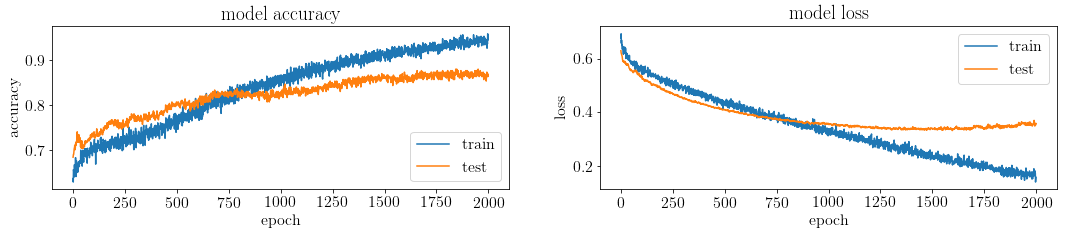

In [25]:
plt.figure(figsize=(18,3))
plt.subplot(121)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()